# 기대 예상 매출 EDA 조사

## 개요

"**자이로스코프와 가속도 센서를 활용한 반응형 응원봉**" 에 대한 사업 발표를 위해 기대되는 예상 매출액을 산정해보아야 한다.

## 시장 규모 파악

K-POP 굿즈 시장의 전체 규모와 성장률을 파악해보자.

### 필요 데이터

-   글로벌 및 국내 K-POP 굿즈 시장의 크기
-   응원봉이 굿즈 시장에서 차지하는 비중

### 수집한 데이터

-   [문화체육관광부,「공연예술조사」, 2022, 2024.12.01, 공연시장 규모](https://kosis.kr/statHtml/statHtml.do?orgId=113&tblId=DT_113_STBL_1025617&conn_path=I2)


In [1]:
from python.base import *


url = f"https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey={KOSIS_API_KEY}&itmId=13103836121T1+13103836121T2+13103836121T3+13103836121T4+&objL1=ALL&objL2=&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=Y&startPrdDe=2008&endPrdDe=2022&outputFields=ORG_ID+TBL_ID+TBL_NM+OBJ_ID+OBJ_NM+OBJ_NM_ENG+NM+NM_ENG+ITM_ID+ITM_NM+ITM_NM_ENG+UNIT_NM+UNIT_NM_ENG+PRD_SE+PRD_DE+LST_CHN_DE+&orgId=113&tblId=DT_113_STBL_1025617"
data = get_json(url)

공연시장규모 = pd.DataFrame(data)
공연시장규모.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TBL_NM       126 non-null    object
 1   PRD_DE       126 non-null    object
 2   TBL_ID       126 non-null    object
 3   ITM_NM       126 non-null    object
 4   ITM_ID       126 non-null    object
 5   UNIT_NM      126 non-null    object
 6   ORG_ID       126 non-null    object
 7   UNIT_NM_ENG  126 non-null    object
 8   C1_OBJ_NM    126 non-null    object
 9   DT           126 non-null    object
 10  PRD_SE       126 non-null    object
 11  C1           126 non-null    object
 12  C1_NM        126 non-null    object
 13  C1_NM_ENG    81 non-null     object
 14  LST_CHN_DE   126 non-null    object
dtypes: object(15)
memory usage: 14.9+ KB


In [2]:
공연시장규모.head(5)

,TBL_NM,PRD_DE,TBL_ID,ITM_NM,ITM_ID,UNIT_NM,ORG_ID,UNIT_NM_ENG,C1_OBJ_NM,DT,PRD_SE,C1,C1_NM,C1_NM_ENG,LST_CHN_DE
0,공연시장 규모,2008,DT_113_STBL_1025617,시설/단체 수,13103836121T1,개백만원명,113,Number Million won Person,형태별,3172,A,131028361211.001,전체,A,2024-08-30
1,공연시장 규모,2009,DT_113_STBL_1025617,시설/단체 수,13103836121T1,개백만원명,113,Number Million won Person,형태별,772,A,131028361211.001,전체,A,2024-08-30
2,공연시장 규모,2010,DT_113_STBL_1025617,시설/단체 수,13103836121T1,개백만원명,113,Number Million won Person,형태별,3034,A,131028361211.001,전체,A,2024-08-30
3,공연시장 규모,2011,DT_113_STBL_1025617,시설/단체 수,13103836121T1,개백만원명,113,Number Million won Person,형태별,868,A,131028361211.001,전체,A,2024-08-30
4,공연시장 규모,2012,DT_113_STBL_1025617,시설/단체 수,13103836121T1,개백만원명,113,Number Million won Person,형태별,3052,A,131028361211.001,전체,A,2024-08-30


In [3]:
공연시장규모['ITM_NM'].unique()

array(['시설/단체 수', '공연장수', '종사자수', '매출액'], dtype=object)

In [4]:
공연시장규모['C1_NM'].unique()

array(['전체', '공연시설', '공연단체'], dtype=object)

In [5]:
공연시장전체매출액 = 공연시장규모[(공연시장규모['ITM_NM'] == '매출액') & (공연시장규모['C1_NM'] == '전체')][['PRD_DE', 'DT']]
공연시장전체매출액['DT'] = pd.to_numeric(공연시장전체매출액['DT']) * 1000000
공연시장전체매출액

,PRD_DE,DT
31,2008,462574000000
32,2009,267556000000
33,2010,549313000000
34,2011,316711000000
35,2012,713045000000
36,2013,414204000000
37,2014,759315000000
38,2015,781491000000
39,2016,747991000000
40,2017,813218000000


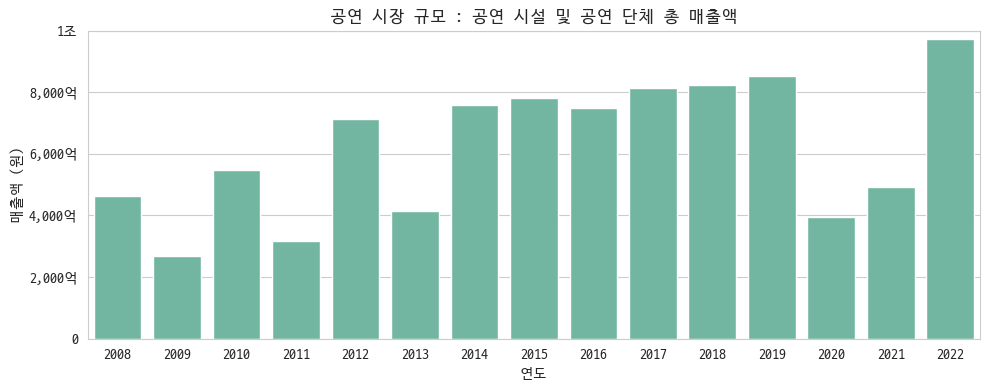

In [6]:
plt.figure(figsize=(10, 4))
plt.title("공연 시장 규모 : 공연 시설 및 공연 단체 총 매출액")
sns.barplot(data=공연시장전체매출액, x='PRD_DE', y='DT')
plt.xlabel('연도')
plt.ylabel('매출액 (원)')
plt.ylim(0, 1e12)
plt.gca().yaxis.set_major_formatter(KoreanNumberUnitFormatter())
plt.tight_layout()

### 질문

왜 일부 연도는 매출액이 적을까?

### 가설

팬데믹으로 인한 고객 감소가 있었을 것이다.

### 가설 2. 열리는 콘서트/공연의 수가 적었을 것이다.

공연시설: 공연장 가동율 데이터가 존재한다. 해당 데이터를 살펴보자.

### 수집한 데이터

-   [문화체육관광부,「공연예술조사」, 2022, 2024.12.02, 공연시설 : 공연장 가동률](https://kosis.kr/statHtml/statHtml.do?orgId=113&tblId=DT_113_STBL_1011895&conn_path=I2)


In [7]:
url = f'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey={KOSIS_API_KEY}&itmId=13103887868T1+13103887868T2+&objL1=ALL&objL2=&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=Y&startPrdDe=2004&endPrdDe=2022&outputFields=ORG_ID+TBL_ID+TBL_NM+OBJ_ID+OBJ_NM+OBJ_NM_ENG+NM+NM_ENG+ITM_ID+ITM_NM+ITM_NM_ENG+UNIT_NM+UNIT_NM_ENG+PRD_SE+PRD_DE+LST_CHN_DE+&orgId=113&tblId=DT_113_STBL_1011895'
data = get_json(url)

공연장가동률 = pd.DataFrame(data)
공연장가동률

,TBL_NM,PRD_DE,TBL_ID,ITM_NM,ITM_ID,UNIT_NM,ORG_ID,UNIT_NM_ENG,C1_OBJ_NM,DT,PRD_SE,C1,C1_NM,C1_NM_ENG,LST_CHN_DE
0,공연시설 : 공연장 가동률,2004,DT_113_STBL_1011895,공연장수,13103887868T1,개%,113,Number %,통계분류,463,A,131028878681.001,전체,A,2024-08-12
1,공연시설 : 공연장 가동률,2006,DT_113_STBL_1011895,공연장수,13103887868T1,개%,113,Number %,통계분류,812,A,131028878681.001,전체,A,2024-08-12
2,공연시설 : 공연장 가동률,2007,DT_113_STBL_1011895,공연장수,13103887868T1,개%,113,Number %,통계분류,891,A,131028878681.001,전체,A,2024-08-12
3,공연시설 : 공연장 가동률,2008,DT_113_STBL_1011895,공연장수,13103887868T1,개%,113,Number %,통계분류,927,A,131028878681.001,전체,A,2024-08-12
4,공연시설 : 공연장 가동률,2009,DT_113_STBL_1011895,공연장수,13103887868T1,개%,113,Number %,통계분류,1021,A,131028878681.001,전체,A,2024-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,공연시설 : 공연장 가동률,2009,DT_113_STBL_1011895,전체 가동률,13103887868T2,개%,113,Number %,통계분류,0,A,131028878681.013005,100석 미만,NaN,2024-08-12
1258,공연시설 : 공연장 가동률,2008,DT_113_STBL_1011895,공연장수,13103887868T1,개%,113,Number %,통계분류,73,A,131028878681.013006,모름-무응답,NaN,2024-08-12
1259,공연시설 : 공연장 가동률,2009,DT_113_STBL_1011895,공연장수,13103887868T1,개%,113,Number %,통계분류,0,A,131028878681.013006,모름-무응답,NaN,2024-08-12
1260,공연시설 : 공연장 가동률,2008,DT_113_STBL_1011895,전체 가동률,13103887868T2,개%,113,Number %,통계분류,91.5,A,131028878681.013006,모름-무응답,NaN,2024-08-12


In [8]:
공연장가동률['ITM_NM'].unique()

array(['공연장수', '전체 가동률'], dtype=object)

In [9]:
공연장가동률['C1_NM'].unique()

array(['전체', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원',
       '충북', '충남', '전북', '전남', '경북', '경남', '제주', '경기/인천', '충청', '전라',
       '경상', '특별-광역시', '광역도', '수도권', '비수도권', '중앙정부', '문예회관', '기타(공공)',
       '대학로', '민간[대학로 외]', '기타(민간)', '공공', '민간', '모름-무응답', '지방자치단체(광역)',
       '지방자치단체(기초)', '공기업', '재단법인', '사단법인', '상법인', '교육기관', '개인', '기 타',
       '기타', '대공연장', '중공연장', '소공연장', '야외공연장', '1000석 이상',
       '500석 이상-1000석 미만', '300석 이상-500석 미만', '100석 이상-300석 미만',
       '100석 미만'], dtype=object)

In [10]:
공연장전체가동률 = 공연장가동률[(공연장가동률['ITM_NM'] == '전체 가동률') & (공연장가동률['C1_NM'] == '전체')][['PRD_DE', 'DT']]
공연장전체가동률['DT'] = pd.to_numeric(공연장전체가동률['DT'])
공연장전체가동률

,PRD_DE,DT
18,2004,50.0
19,2006,48.8
20,2007,46.5
21,2008,66.3
22,2009,51.4
23,2010,51.4
24,2011,47.0
25,2012,67.4
26,2013,72.5
27,2014,67.4


In [11]:
df = pd.merge(공연시장전체매출액, 공연장전체가동률, on=['PRD_DE'], how='left')
df.columns = ['연도', '매출액', '가동률']
df

,연도,매출액,가동률
0,2008,462574000000,66.3
1,2009,267556000000,51.4
2,2010,549313000000,51.4
3,2011,316711000000,47.0
4,2012,713045000000,67.4
5,2013,414204000000,72.5
6,2014,759315000000,67.4
7,2015,781491000000,65.8
8,2016,747991000000,60.8
9,2017,813218000000,61.3


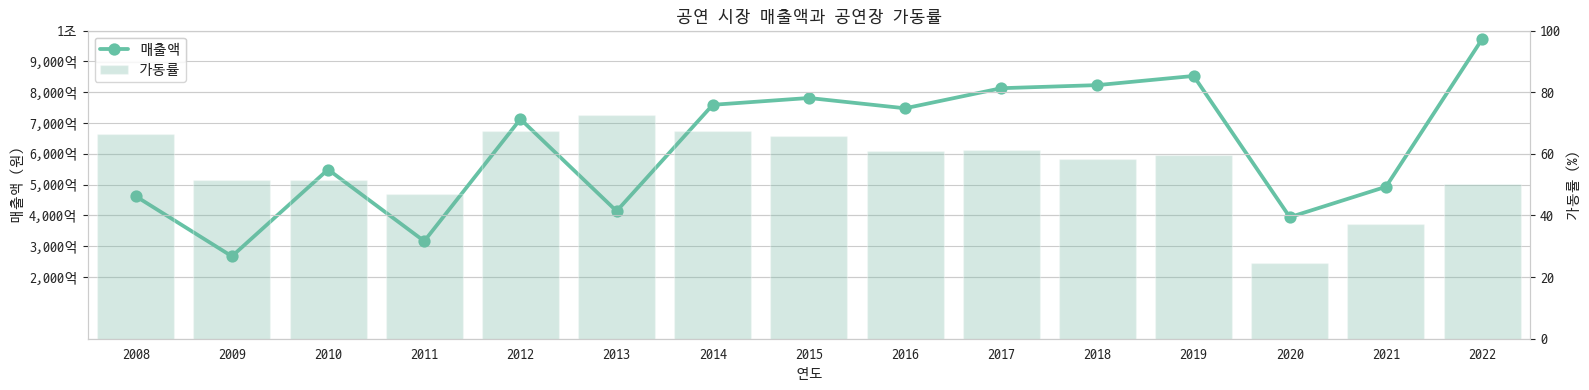

In [12]:
plt.figure(figsize=(16, 4))
plt.title("공연 시장 매출액과 공연장 가동률")

ax1 = plt.gca()
sns.pointplot(ax=ax1, data=df, x='연도', y='매출액', label='매출액')
ax1.set_ylabel('매출액 (원)')
ax1.set_yticks(ax1.get_yticks(), KoreanNumberUnitFormatter().format_ticks(ax1.get_yticks()))
ax1.set_ylim(0, 1e12)

ax2 = ax1.twinx()
sns.barplot(ax=ax2, data=df, x='연도', y='가동률', alpha=0.3, label='가동률')
ax2.set_ylabel('가동률 (%)')
ax2.set_ylim(0, 100)

# combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

#### 매출액과 가동률의 관계에 대해서,

그래프만 봐서는 확실하게 연관성이 있다고 판단하기 모호하다. 그렇다고 관련 없다고 보기도 어렵다.

수치학적인 분석을 위해 두 변수의 Correlation을 파악해보자.

Correlation 값이 0.36이면 두 변수 간의 유사성을 어떻게 평가할지는 상황과 맥락에 따라 다릅니다. 상관계수(Correlation Coefficient)는 -1에서 1 사이의 값을 가지며, 두 변수 간의 선형적 관계를 측정합니다.

---

#### 상관계수 해석 기준

1.	0.0 ~ 0.1: 거의 상관이 없음
	-	두 변수 간에 관계가 없다고 볼 수 있습니다.
2.	0.1 ~ 0.3: 약한 상관 관계(Weak Correlation)
	-	두 변수 간에 관계가 있지만, 유의미한 수준은 아닐 수 있음.
3.	0.3 ~ 0.5: 보통 상관 관계(Moderate Correlation)
	-	변수 간에 상관이 있다고 볼 수 있으나, 강한 유사성은 아님.
4.	0.5 ~ 0.7: 강한 상관 관계(Strong Correlation)
	-	변수 간에 꽤 유사한 패턴이 있음.
5.	0.7 이상: 매우 강한 상관 관계(Very Strong Correlation)
	-	변수 간의 관계가 매우 유사하며, 선형적 의존도가 높음.

<Axes: >

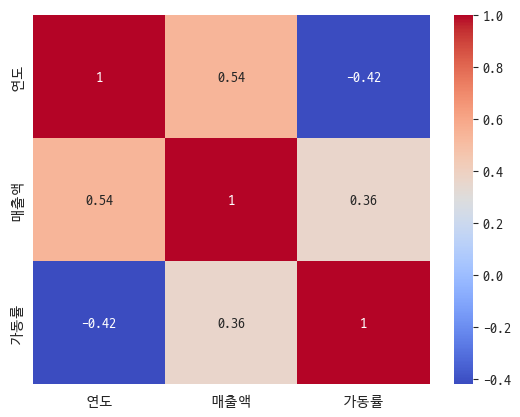

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### Correlation = 0.36에 대한 해석

-	상관계수 0.36은 **보통 상관 관계(Moderate Correlation)**에 속합니다.
-	이는 두 변수 간에 일정한 관계가 있음을 나타내지만, 매우 유사하다고 판단하기는 어렵습니다.
-	맥락에 따른 해석:
-	데이터 분석 목적: 변수 간 약간의 연관성만으로도 의미가 있다면 유사하다고 볼 수 있습니다.
-	예: 마케팅에서 고객의 나이와 구매 빈도 사이의 상관관계.
-	예측 모델링: 0.36은 약한 관계로, 단독 변수로는 예측력이 낮을 수 있습니다.

---

#### 결론

상관계수 0.36은 두 변수 간에 일정한 관계가 있지만, 강력한 유사성을 주장하기에는 다소 낮은 값입니다. 분석 목적에 따라 유사성의 의미를 다르게 정의해야 합니다. 추가적으로 변수의 관계를 더 정확히 이해하려면 다음을 고려할 수 있습니다:
1.	시각화: 스캐터플롯으로 변수 간 패턴을 확인.
2.	비선형 관계 확인: 피어슨 상관계수는 선형 관계만 측정하므로 비선형 관계를 탐색.
3.	다른 분석 방법: 변수 간 독립성을 검정하거나 회귀분석을 수행.


---

#### 개인적인 분석

값이 애매하게 나왔다.

- 공연장가동률 말고, 연도 별 극장들의 공연 일수를 봐야하지 않을까?
- 극장의 객석 규모별로도 비교하여 살펴보면 좋을지도?

## 수집한 데이터

-   [문화체육관광부,「공연예술조사」, 2022, 2024.12.02, 공연시설 : 공연장 가동일수](https://kosis.kr/statHtml/statHtml.do?orgId=113&tblId=DT_113_STBL_1022496&conn_path=I2)


In [106]:
data = """"통계분류(1)","통계분류(2)",통계분류(3),2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
"전체","공연장수",소계,967,,1093,1188,1227,1280,1290,1268,1323,1324,1334,1325,1281,1328
"전체","공연일수",합계,105298,104500,99991,137700,150366,156147,144912,127988,130197,124248,123132,47701,71107,102951
"전체","공연일수",평균,108.9,102.5,91.5,115.9,122.5,122,112.3,100.9,98.4,93.8,92.3,36,55.5,77.5
"전체","기타 행사일수",합계,31579,40924,34106,37322,31570,46034,35250,32501,39190,40203,37570,11435,14721,25076
"전체","기타 행사일수",평균,32.7,40.1,31.2,31.4,25.7,36,27.3,25.6,29.6,30.4,28.2,8.6,11.5,18.9
"전체","공연준비일수",합계,30556,37452,39204,41892,47098,31728,49537,48521,50379,44488,54612,28744,43345,52772
"전체","공연준비일수",평균,31.6,36.7,35.9,35.3,38.4,24.8,38.4,38.3,38.1,33.6,40.9,21.7,33.8,39.7
"""

공연장가동일수 = pd.read_csv(io.StringIO(data)).T.drop(columns=[2,3,4,5,6]).iloc[3:].reset_index()
공연장가동일수.columns = ['PRD_DE', '공연장수', '공연일수_합계']
공연장가동일수

,PRD_DE,공연장수,공연일수_합계
0,2009,967.0,105298.0
1,2010,NaN,104500.0
2,2011,1093.0,99991.0
3,2012,1188.0,137700.0
4,2013,1227.0,150366.0
5,2014,1280.0,156147.0
6,2015,1290.0,144912.0
7,2016,1268.0,127988.0
8,2017,1323.0,130197.0
9,2018,1324.0,124248.0


In [107]:
df = pd.merge(공연시장전체매출액, 공연장가동일수, on=['PRD_DE'], how='left')
df.columns = ['연도', '매출액', '공연장수', '공연일수_합계']
df

,연도,매출액,공연장수,공연일수_합계
0,2008,462574000000,NaN,NaN
1,2009,267556000000,967.0,105298.0
2,2010,549313000000,NaN,104500.0
3,2011,316711000000,1093.0,99991.0
4,2012,713045000000,1188.0,137700.0
5,2013,414204000000,1227.0,150366.0
6,2014,759315000000,1280.0,156147.0
7,2015,781491000000,1290.0,144912.0
8,2016,747991000000,1268.0,127988.0
9,2017,813218000000,1323.0,130197.0


<Axes: >

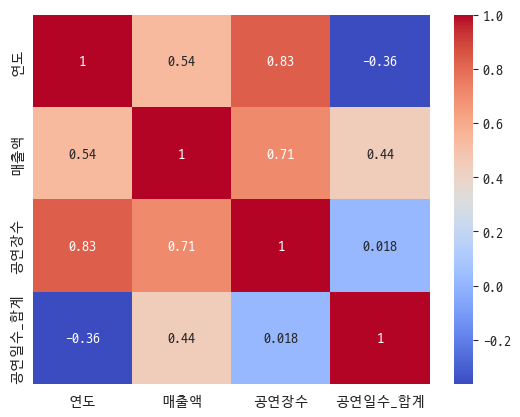

In [108]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

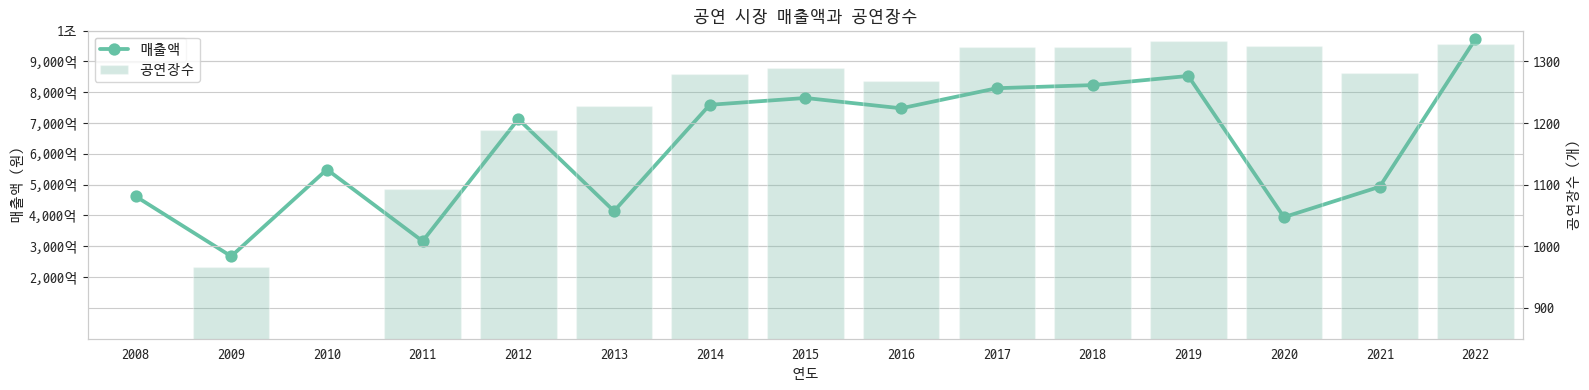

In [115]:
plt.figure(figsize=(16, 4))
plt.title("공연 시장 매출액과 공연장수")

ax1 = plt.gca()
sns.pointplot(ax=ax1, data=df, x='연도', y='매출액', label='매출액')
ax1.set_ylabel('매출액 (원)')
ax1.set_yticks(ax1.get_yticks(), KoreanNumberUnitFormatter().format_ticks(ax1.get_yticks()))
ax1.set_ylim(0, 1e12)

ax2 = ax1.twinx()
sns.barplot(ax=ax2, data=df, x='연도', y='공연장수', alpha=0.3, label='공연장수')
ax2.set_ylabel('공연장수 (개)')
ax2.set_ylim(850, 1350)

# combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

## 결론

매출액은 공연장수와 밀접한 관련이 있는 것 같다.

In [15]:
target = 'DT_x'  # 매출액
x = df.drop(target, axis=1)
y = df.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3)

#생성
model = RandomForestClassifier(random_state=0)  # 재현성을 위해 random_state 설정함

#학습
model.fit(x_train, y_train)
pred = model.predict(x_val)

# 변수 중요도 추출
r0 = plot_feature_importance(model.feature_importances_, list(x_train), False)
r0

ValueError: could not convert string to float: '종사자수'